In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [10]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory( "C:\\Users\\rauna\\Desktop\\git\\git demo\\Intro-To-ML-GDSC-IITK\\Week4\\train" ,
                                          target_size=(250,250),batch_size = 32,class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory( "C:\\Users\\rauna\\Desktop\\git\\git demo\\Intro-To-ML-GDSC-IITK\\Week4\\test",
                                          target_size=(250,250),
                                          batch_size =20,
                                          class_mode = 'binary')
# to avoid unicode error use double backslash .

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [7]:
test_dataset.class_indices


{'cats': 0, 'dogs': 1}

In [11]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(250,250,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [13]:
#steps_per_epoch = train_imagesize/batch_size
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit_generator(train_dataset,
         steps_per_epoch = 17,
         epochs = 10,
         validation_data = test_dataset
       
         )


C:\Users\rauna\AppData\Local\Temp\ipykernel_9012\876771949.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_dataset,


Epoch 1/10
17/17 [==============================] - 40s 2s/step - loss: 0.5523 - accuracy: 0.7500 - val_loss: 0.8266 - val_accuracy: 0.6071
Epoch 2/10
17/17 [==============================] - 36s 2s/step - loss: 0.4136 - accuracy: 0.8076 - val_loss: 0.8304 - val_accuracy: 0.6357
Epoch 3/10
17/17 [==============================] - 34s 2s/step - loss: 0.3452 - accuracy: 0.8305 - val_loss: 0.9270 - val_accuracy: 0.6286
Epoch 4/10
17/17 [==============================] - 35s 2s/step - loss: 0.2917 - accuracy: 0.8743 - val_loss: 1.1794 - val_accuracy: 0.6643
Epoch 5/10
17/17 [==============================] - 34s 2s/step - loss: 0.2503 - accuracy: 0.8914 - val_loss: 1.1472 - val_accuracy: 0.6429
Epoch 6/10
17/17 [==============================] - 34s 2s/step - loss: 0.2249 - accuracy: 0.9086 - val_loss: 0.9628 - val_accuracy: 0.6571
Epoch 7/10
17/17 [==============================] - 38s 2s/step - loss: 0.2267 - accuracy: 0.9105 - val_loss: 1.1251 - val_accuracy: 0.6571
Epoch 8/10
17/17 [==

In [20]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(250,250))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        plt.xlabel("CAT",fontsize=30)

1/1 [==============================] - 0s 464ms/step
[[0.]]


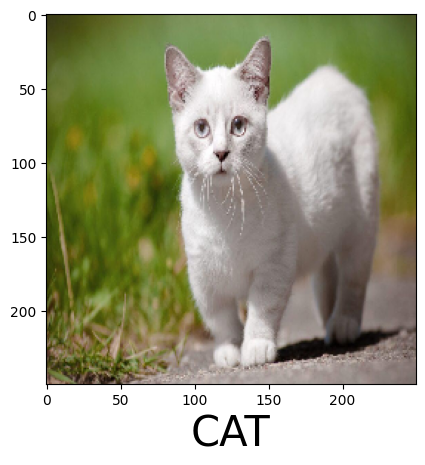

In [21]:
predictImage(r"C:\Users\rauna\Desktop\git\git demo\Intro-To-ML-GDSC-IITK\Week4\test\cats\cat_375.jpg")

1/1 [==============================] - 0s 76ms/step
[[0.]]


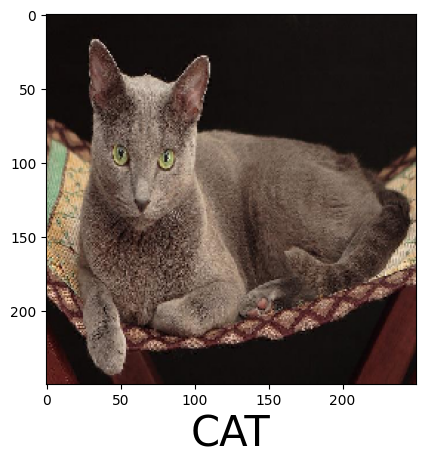

In [22]:
predictImage(r"C:\Users\rauna\Desktop\git\git demo\Intro-To-ML-GDSC-IITK\Week4\test\cats\cat_147.jpg")

1/1 [==============================] - 0s 83ms/step
[[0.]]


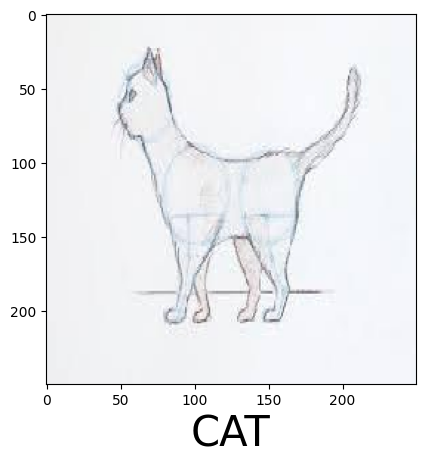

In [23]:
predictImage(r"C:\Users\rauna\Desktop\git\git demo\Intro-To-ML-GDSC-IITK\Week4\test\cats\cat_468.jpg")

1/1 [==============================] - 0s 78ms/step
[[0.]]


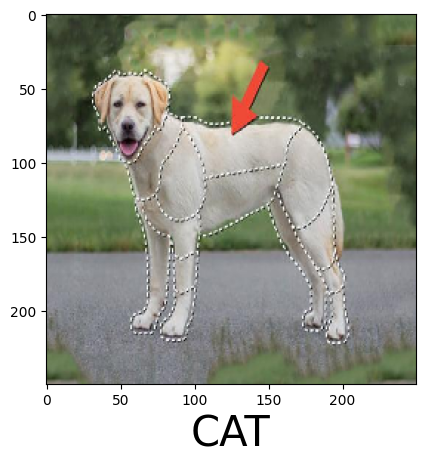

In [24]:
predictImage(r"C:\Users\rauna\Desktop\git\git demo\Intro-To-ML-GDSC-IITK\Week4\test\dogs\dog_59.jpg")

1/1 [==============================] - 0s 69ms/step
[[1.]]


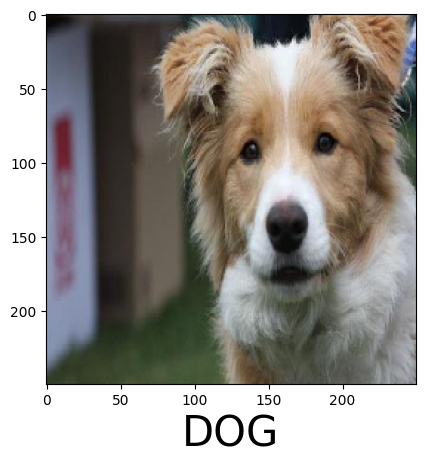

In [25]:
predictImage(r"C:\Users\rauna\Desktop\git\git demo\Intro-To-ML-GDSC-IITK\Week4\test\dogs\dog_177.jpg")

1/1 [==============================] - 0s 73ms/step
[[0.]]


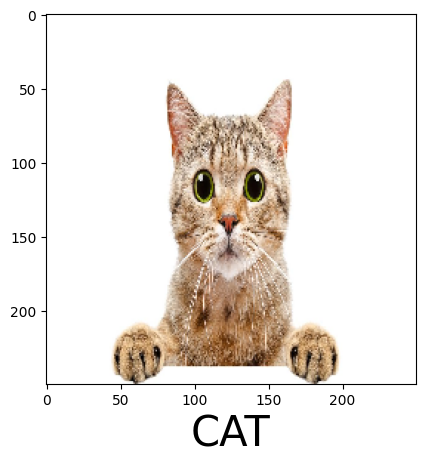

In [26]:
predictImage(r"C:\Users\rauna\Desktop\git\git demo\Intro-To-ML-GDSC-IITK\Week4\test\cats\cat_106.jpg")

1/1 [==============================] - 0s 59ms/step
[[0.]]


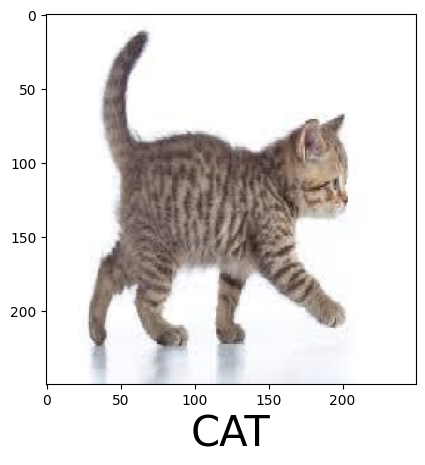

In [27]:
predictImage(r"C:\Users\rauna\Desktop\git\git demo\Intro-To-ML-GDSC-IITK\Week4\train\cats\cat_391.jpg")